# Ejercicio 4: Modelo Probabilístico
# Objetivo de la práctica
* Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
* Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
* Comparar la recuperación con BM25 frente a TF-IDF.
* Analizar visualmente las diferencias entre los modelos.
* Evaluar si los rankings generados son consistentes con lo que considerarías   documentos relevantes.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/20-newsgroups/misc.forsale.txt
/kaggle/input/20-newsgroups/rec.autos.txt
/kaggle/input/20-newsgroups/list.csv
/kaggle/input/20-newsgroups/comp.os.ms-windows.misc.txt
/kaggle/input/20-newsgroups/sci.electronics.txt
/kaggle/input/20-newsgroups/comp.sys.mac.hardware.txt
/kaggle/input/20-newsgroups/talk.politics.mideast.txt
/kaggle/input/20-newsgroups/talk.politics.guns.txt
/kaggle/input/20-newsgroups/talk.religion.misc.txt
/kaggle/input/20-newsgroups/comp.graphics.txt
/kaggle/input/20-newsgroups/soc.religion.christian.txt
/kaggle/input/20-newsgroups/rec.sport.hockey.txt
/kaggle/input/20-newsgroups/rec.sport.baseball.txt
/kaggle/input/20-newsgroups/comp.windows.x.txt
/kaggle/input/20-newsgroups/comp.sys.ibm.pc.hardware.txt
/kaggle/input/20-newsgroups/rec.motorcycles.txt
/kaggle/input/20-newsgroups/sci.med.txt
/kaggle/input/20-newsgroups/sci.space.txt
/kaggle/input/20-newsgroups/alt.atheism.txt
/kaggle/input/20-newsgroups/sci.crypt.txt
/kaggle/input/20-newsgroups/talk.politics

# Parte 0: Carga del Corpus

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import os
from os.path import basename

In [ ]:
import os

ruta = "/kaggle/input/20-newsgroups"
corpus = []
labels = []

if os.path.exists(ruta):
    for filename in os.listdir(ruta):
        if filename.endswith(".txt"):
            archivo_path = os.path.join(ruta, filename)
            try:
                with open(archivo_path, "r", encoding="utf-8", errors="ignore") as f:
                    texto = f.read()
                    corpus.append(texto)
                    labels.append(os.path.splitext(filename)[0])
            except Exception as e:
                print(f"Error al leer {archivo_path}: {e}")
    print("Cargado correctamente")


Cargado correctamente


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(doc):
    # aqui se normaliza y se quitan los signos 
    doc = re.sub(pattern=r'[^\w\s]', repl='', string=doc.lower())
    
    # aqui se tokeniza
    tokens = word_tokenize(doc)
    
    # aqui se aplicar Stemming
    processed_tokens = []
    for token in tokens:
        if token not in stop_words and len(token) > 3: 
            stemmed_token = stemmer.stem(token)
            processed_tokens.append(stemmed_token)   
    return " ".join(processed_tokens)

In [ ]:
print(corpus[0][:120])

Newsgroup: misc.forsale
document_id: 70337
From: kedz@bigwpi.WPI.EDU (John Kedziora)
Subject: Motorcycle wanted.

Sender


In [ ]:
print(processed_corpus[0][:100])

newsgroup miscforsal document_id 70337 kedzbigwpiwpiedu john kedziora subject motorcycl want sender 


# Parte 1: Cálculo de TF, DF, IDF y TF-IDF
## Actividad
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.


 Matriz TF 


,00,000,0000,00000,000000,00000000,0000000004,0000000005,00000000b,00000001,...,zzt,zztop,zzvsi,zzx,zzy_3w,zzz,zzzoh,zzzz,zzzzzz,zzzzzzt
0,2414,170,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52,256,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,120,26,2,0,0,0,0,0,0,0,...,2,0,2,0,2,0,2,0,0,0
3,50,52,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 Cálculo de DF 


,Término,DF
0,00,20
59296,bigger,20
58515,bell,20
138441,planning,20
58628,benefit,20
138412,plan,20
138398,plain,20
138381,places,20
138375,placed,20
138372,place,20



 Matriz TF-IDF


,00,000,0000,00000,000000,00000000,0000000004,0000000005,00000000b,00000001,...,zzt,zztop,zzvsi,zzx,zzy_3w,zzz,zzzoh,zzzz,zzzzzz,zzzzzzt
0,0.267350,0.018827,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.004803,0.023643,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.000548,0.000119,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000031,0.0,0.000031,0.0,0.000031,0.0,0.000031,0.0,0.0,0.0
3,0.005823,0.006056,0.000430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.004392,0.002995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


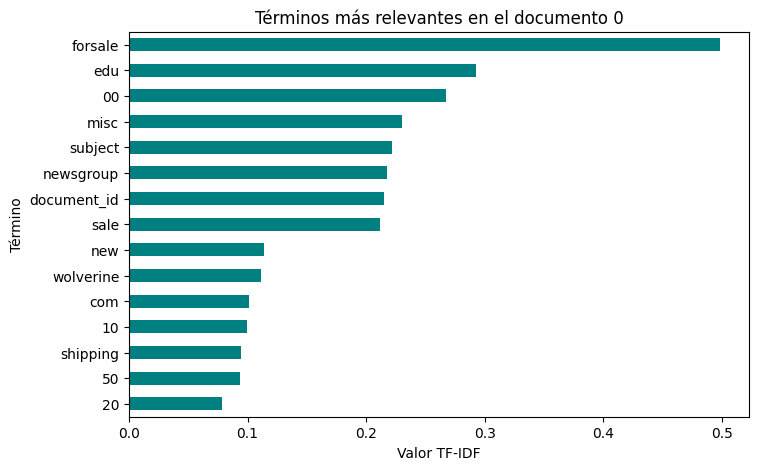

In [ ]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

# Matriz TF
X_tf = vectorizer.fit_transform(corpus)
tf_df = pd.DataFrame(X_tf.toarray(), columns=vectorizer.get_feature_names_out())
print("\n Matriz TF ")
display(tf_df.head())

# Aqui se calcula el DF 
df = (X_tf > 0).sum(axis=0).A1
df_df = pd.DataFrame({'Término': vectorizer.get_feature_names_out(),'DF': df})
print(" Cálculo de DF ")
display(df_df.sort_values('DF', ascending=False).head(10))

# Aqui se cálcula TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\n Matriz TF-IDF")
display(tfidf_df.head())

# Visualizacion de los datos para comparacion 
doc_idx = 0
top_terms = tfidf_df.iloc[doc_idx].sort_values(ascending=False).head(15)

plt.figure(figsize=(8,5))
top_terms.sort_values().plot(kind='barh', color='teal')
plt.title(f"Términos más relevantes en el documento {doc_idx}")
plt.xlabel("Valor TF-IDF")
plt.ylabel("Término")
plt.show()


# Parte 2: Ranking de documentos usando TF-IDF
## Actividad
1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# se define la consulta a realizar
query = "NASA satellite space mission"
processed_query = preprocess_text(query)


# construimos el vector consulta
query_vec = tfidf_vectorizer.transform([processed_query])

# aqui se calcula la similitid con en donde se compara el vector de la consulta 
# con todos los docummentos
cosine_sim = cosine_similarity(query_vec, X_tfidf).flatten()

top_10_indices = cosine_sim.argsort()[-3:][::-1]

# se crea un ranking y se muestra
df_ranking = pd.DataFrame({
    'Posicion': top_10_indices,'Similitud': cosine_sim[top_10_indices]})

display(df_ranking)

,Posicion,Similitud
0,16,0.374303
1,8,0.024386
2,12,0.019187


# Parte 3: Ranking con BM25
# Actividad
1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [ ]:
# Parámetros para controlar saturacion y penalizacion
k1 = 1.5
b = 0.75

# se convierte a matriz nunpy y guarda los resultados
tf = X_tf.toarray() 
N = tf.shape[0]  

# calculo de la frecuencia 
df = (tf > 0).sum(axis=0)

# calculo de cuan raro son los terminos "IDF"
idf = np.log((N - df + 0.5) / (df + 0.5) + 1)

# caclculo del promedio de los docuemntos y suma los terminos
doc_len = tf.sum(axis=1) 
avgdl = doc_len.mean()

# se vectoriza la consulta
querytokens = query.lower().split()

# se obtiene los indices 
query_indices = [vectorizer.vocabulary_.get(t) for t in query_tokens 
                 if vectorizer.vocabulary_.get(t) is not None]

# se calcula el BM25
scores = np.zeros(N)
for i in range(N):
    for idx in query_indices: 
        f = tf[i, idx] 
        numerator = f * (k1 + 1)
        denominator = f + k1 * (1 - b + b * doc_len[i] / avgdl)
        scores[i] += idf[idx] * (numerator / denominator)

# Se crea el ranking
bm25_ranking_df = pd.DataFrame({
    'Posicion': np.arange(N),
    'Score_BM25': scores
}).sort_values(by='Score_BM25', ascending=False).reset_index(drop=True)

display(bm25_ranking_df.head(3))

print("\n Comparación con construccion manual (parte 2)")
display(df_ranking)

print("\n Construccion BM25 (parte 3)")
display(bm25_ranking_df.head(3))

,Posicion,Score_BM25
0,16,0.059960
1,3,0.059942
2,7,0.059914



 Comparación con construccion manual (parte 2)


,Posicion,Similitud
0,16,0.374303
1,8,0.024386
2,12,0.019187



 Construccion BM25 (parte 3)


,Posicion,Score_BM25
0,16,0.059960
1,3,0.059942
2,7,0.059914


# Parte 4: Comparación visual entre TF-IDF y BM25
# Actividad
1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

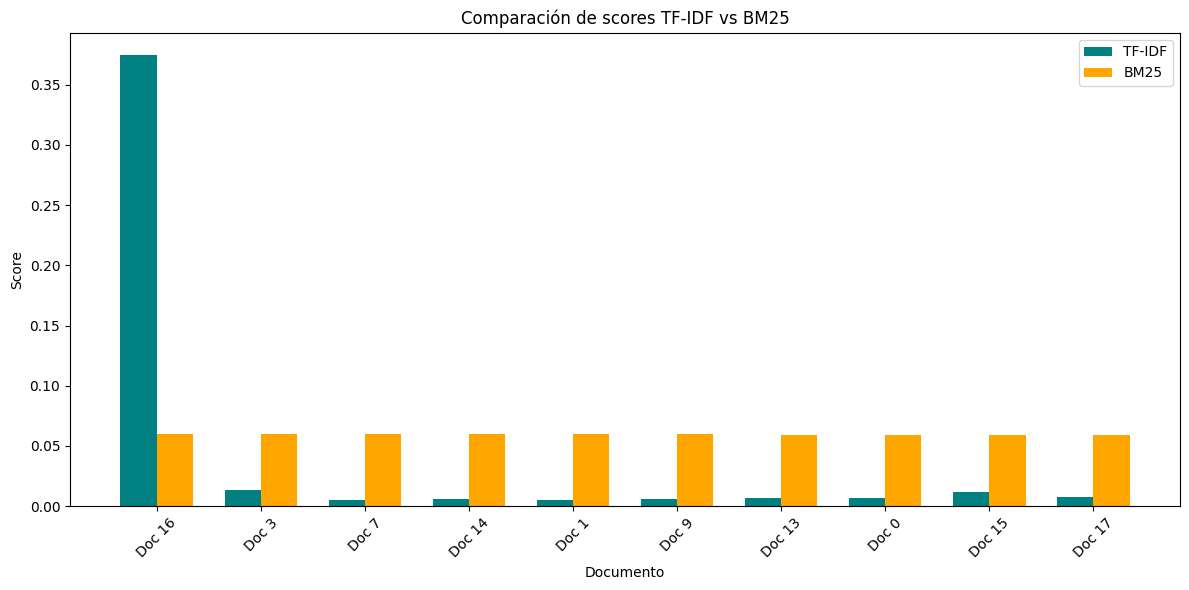

In [ ]:
# como muestra de toma 10 documentos
top_n = 10
top_docs_bm25 = bm25_ranking_df.head(top_n)['Posicion'].values

# se extrae los scores de TF-IDF y BM25
tfidf_scores_top = cosine_sim[top_docs_bm25]
bm25_scores_top = scores[top_docs_bm25]

# nombres para el eje X
doc_labels = [f'Doc {i}' for i in top_docs_bm25]

# Crear gráfico
x = np.arange(len(doc_labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, tfidf_scores_top, width, label='TF-IDF', color='teal')
plt.bar(x + width/2, bm25_scores_top, width, label='BM25', color='orange')

plt.xticks(x, doc_labels, rotation=45)
plt.xlabel('Documento')
plt.ylabel('Score')
plt.title('Comparación de scores TF-IDF vs BM25')
plt.legend()
plt.tight_layout()
plt.show()


# Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
En el gráfico se observa que el documento 16 tiene un score mucho más alto del modelo TF-IDF que el BM25. Es correcto ya que el documento 16 esta muy relacionado con las querys hechas en este caso el documento es sci.space.txt y la query es "NASA satellite space mission"

# Sugiere: ¿A qué se podría deber esta diferencia?

1. Se debe a que tf-idf se basa mas en la frecuencia del término que encuentra en el documento. Si un documento contiene muchas repeticiones de la consulta, tf-idf le dará un valor muy alto, sin importar la longitud del texto.

2. BM25 en cambio, tiene una normalización por longitud del doc y saturación de frecuencia lo que evita que un documento largo o con muchas repeticiones de palabras domine. 

# Parte 5: Evaluación con consulta relevante
# Actividad
1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [ ]:
# se elige una etiqueta
relevant_label = "sci.space" 
# se crea un 'set' con los índices de los docs "relevantes".
relevantes = set([i for i, label in enumerate(labels) if label == relevant_label])


# se calcula precision
def precision_at_k(ranking, relevantes, k=3):
    top_k = ranking[:k]
    n_relevantes = sum([1 for doc in top_k if doc in relevantes])
    return n_relevantes / k

# se calcula average precision 
def average_precision(ranking, relevantes):
    ap = 0.0
    n_relevantes_encontrados = 0
    total_relevantes = len(relevantes)

    if total_relevantes == 0:
        return 0.0
        
    for i, doc in enumerate(ranking, start=1):
        if doc in relevantes:
            n_relevantes_encontrados += 1
            ap += n_relevantes_encontrados 
            
    return ap / total_relevantes

#se calcula los rankings
ranking_tfidf = np.argsort(cosine_sim)[::-1]
ranking_bm25 = np.argsort(scores)[::-1]

# se calculamos las métricas
p3_tfidf = precision_at_k(ranking_tfidf, relevantes, k=3)
p3_bm25 = precision_at_k(ranking_bm25, relevantes, k=3)

map_tfidf = average_precision(ranking_tfidf, relevantes)
map_bm25 = average_precision(ranking_bm25, relevantes)

# resultados
df_evaluacion = pd.DataFrame({
    'Precision@3': [p3_tfidf, p3_bm25],'MAP': [map_tfidf, map_bm25]}, index=['TF-IDF', 'BM25'])

display(df_evaluacion)

,Precision@3,MAP
TF-IDF,0.333333,1.0
BM25,0.333333,1.0


# ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?
Para esta query que se realizó se obtuvo que los dos modelos tuvieron un rendimiento y precisión iguales, lo que signiifca que para querys bien definidas o en colecciones pequeñas los dos modelos tienen muy buenos resultados 